In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import itables
from main_graph import BaseGraph
itables.init_notebook_mode()

In [4]:
df_install_main = pd.read_csv(r'D:\WORK FOLDER\Yaroslav\scripts_python\vizor_task\installs_main.csv')
df_install_s_2 = pd.read_csv(r'D:\WORK FOLDER\Yaroslav\scripts_python\vizor_task\installs_s2.csv')

In [4]:
df_install_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308568 entries, 0 to 308567
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Unnamed: 0                308568 non-null  int64 
 1   install_time              308568 non-null  object
 2   source                    308568 non-null  object
 3   contributor_1             308568 non-null  object
 4   contributor_2             308568 non-null  object
 5   contributor_1_touch_time  61883 non-null   object
 6   contributor_2_touch_time  15021 non-null   object
dtypes: int64(1), object(6)
memory usage: 16.5+ MB


In [5]:
df_install_main.head()

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [6]:
df_install_main.isna().mean()

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [5]:
df_install_main['install_time']=pd.to_datetime(df_install_main['install_time'])
df_install_main['contributor_1_touch_time']=pd.to_datetime(df_install_main['contributor_1_touch_time'])
df_install_main['contributor_2_touch_time']=pd.to_datetime(df_install_main['contributor_2_touch_time'])
df_install_main['contributor_1_date']=pd.to_datetime(df_install_main['contributor_1_touch_time'].dt.date)
df_install_main['contributor_2_date']=pd.to_datetime(df_install_main['contributor_2_touch_time'].dt.date)
df_install_main['install_date']=pd.to_datetime(df_install_main['install_time'].dt.date)
df_install_main['install_year']=pd.to_datetime(df_install_main['install_time']).dt.year
df_install_main['install_day']=pd.to_datetime(df_install_main['install_time']).dt.day

In [8]:
df_install_main.describe()

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [9]:
df_install_main.install_time.value_counts()

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [10]:
df_install_main.source.value_counts()

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [11]:
df_install_main.contributor_1.value_counts()

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [12]:
df_install_main.contributor_2.value_counts()

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


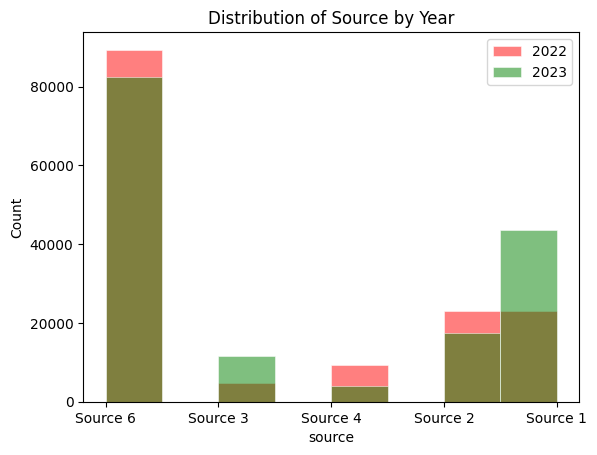

In [12]:


df_2022 = df_install_main[df_install_main['install_year'] == 2022]
df_2023 = df_install_main[df_install_main['install_year'] == 2023]

graph_bar = BaseGraph()

graph_bar.get_plot_hist(df_2022,df_2023,'source','Distribution of Source by Year')

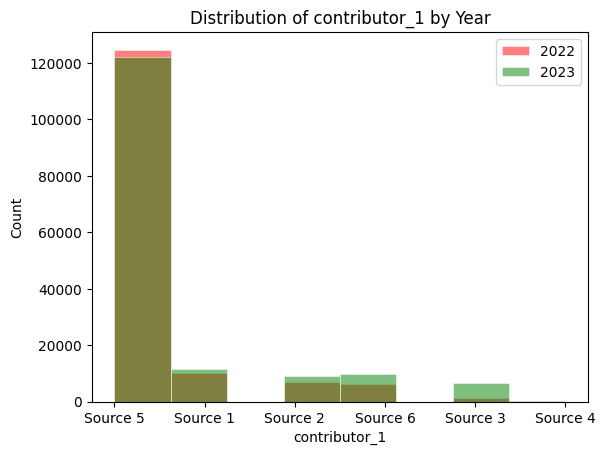

In [13]:
graph_bar = BaseGraph()

graph_bar.get_plot_hist(df_2022,df_2023,'contributor_1','Distribution of contributor_1 by Year')

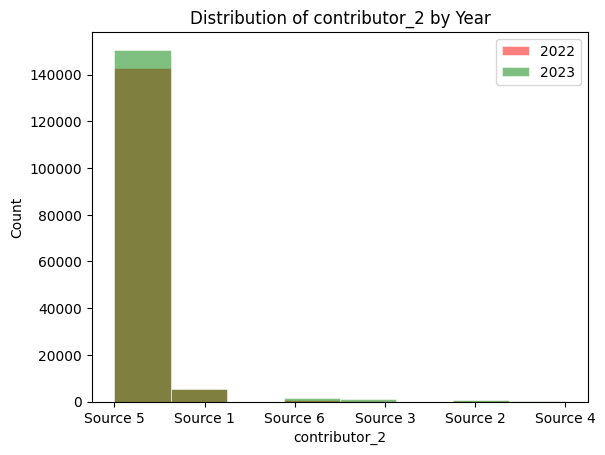

In [14]:
graph_bar = BaseGraph()

graph_bar.get_plot_hist(df_2022,df_2023,'contributor_2','Distribution of contributor_2 by Year')



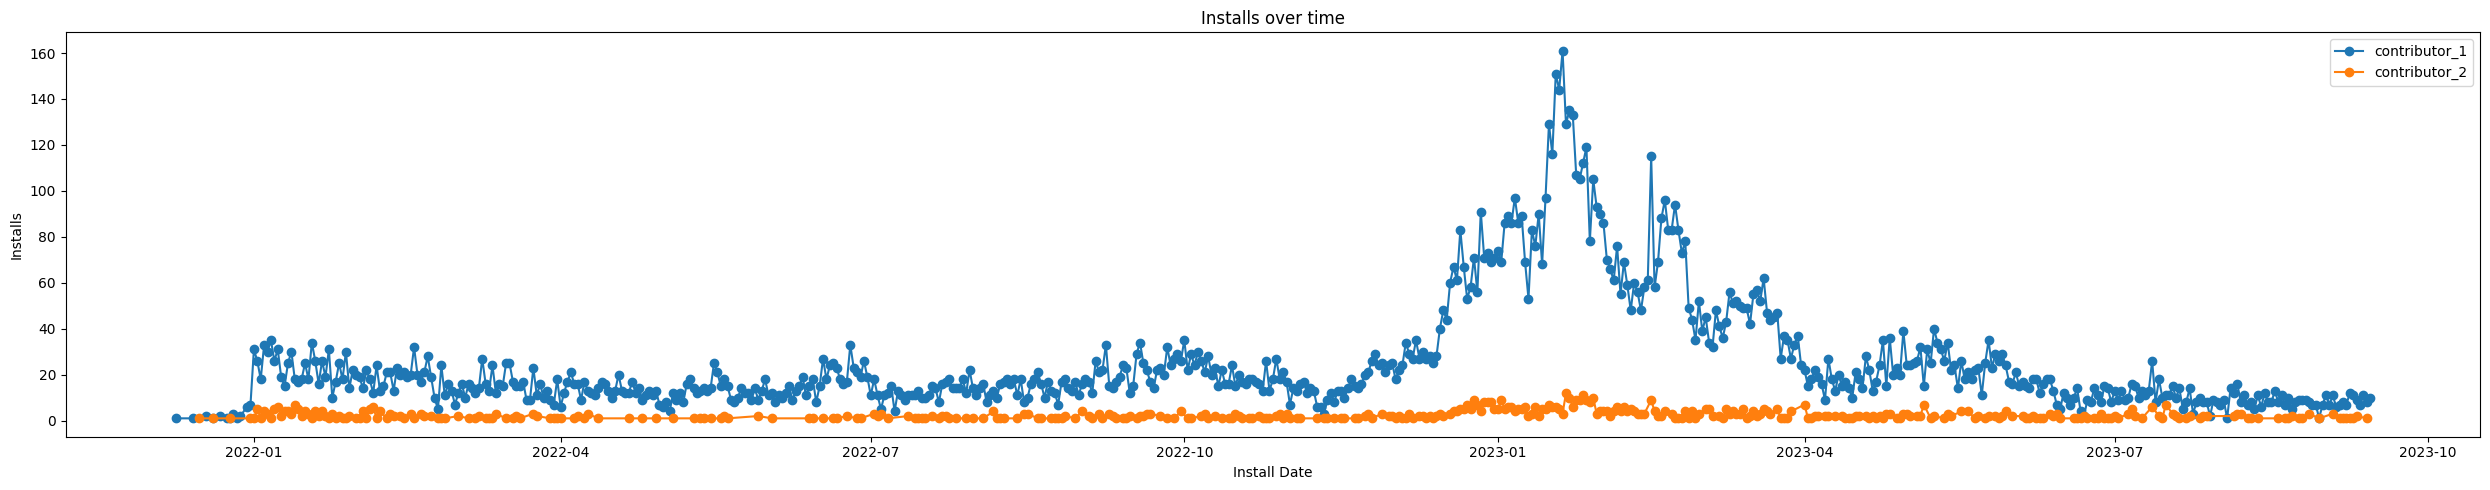

In [144]:
df_sor_2_cont_1=df_install_main[df_install_main['contributor_1']=='Source 2']
df_sor_2_cont_1=df_sor_2_cont_1.groupby(['contributor_1_date'])['contributor_1'].agg(['count']).reset_index().rename(columns={'count':'contributor_1'})

df_sor_2_cont_2=df_install_main[df_install_main['contributor_2']=='Source 2']
df_sor_2_cont_2=df_sor_2_cont_2.groupby(['contributor_2_date'])['contributor_2'].agg(['count']).reset_index().rename(columns={'count':'contributor_2'})


fig, ax = plt.subplots(figsize=(25, 5))

# Предположим, что все данные в df_compare
ax.plot(df_sor_2_cont_1['contributor_1_date'], df_sor_2_cont_1['contributor_1'], marker='o', linestyle='-', label='contributor_1')
ax.plot(df_sor_2_cont_2['contributor_2_date'], df_sor_2_cont_2['contributor_2'], marker='o', linestyle='-', label='contributor_2')

ax.set_xlabel('Install Date')
ax.set_ylabel('Installs')
ax.set_title('Installs over time')
ax.legend()  # добавляем легенду
#plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [145]:
import plotly.graph_objects as go

# Убедимся, что даты в формате datetime
df_sor_2_cont_1['contributor_1_date'] = pd.to_datetime(df_sor_2_cont_1['contributor_1_date'])
df_sor_2_cont_2['contributor_2_date'] = pd.to_datetime(df_sor_2_cont_2['contributor_2_date'])

fig = go.Figure()

# contributor_1
fig.add_trace(go.Scatter(
    x=df_sor_2_cont_1['contributor_1_date'],
    y=df_sor_2_cont_1['contributor_1'],
    mode='lines+markers',
    name='contributor_1',
    hovertemplate='contributor_1: %{y}<br>Date: %{x}<extra></extra>'
))

# contributor_2
fig.add_trace(go.Scatter(
    x=df_sor_2_cont_2['contributor_2_date'],
    y=df_sor_2_cont_2['contributor_2'],
    mode='lines+markers',
    name='contributor_2',
    hovertemplate='contributor_2: %{y}<br>Date: %{x}<extra></extra>'
))

# Настройки графика
fig.update_layout(
    title='Installs over time by contributor',
    xaxis_title='Install Date',
    yaxis_title='Installs',
    xaxis=dict(tickangle=-30),
    width=1200,
    height=500,
    hovermode='x unified'  # показывает значения всех линий при наведении на одну дату
)

fig.show()


,contributor_2_date,contributor_1
0,2021-12-16,1
1,2021-12-20,1
2,2021-12-25,1
3,2021-12-31,1
4,2022-01-01,1
...,...,...
403,2023-09-07,1
404,2023-09-08,1
405,2023-09-09,1
406,2023-09-10,2


In [8]:
df_install_main.groupby(['install_year','source','contributor_1','contributor_2'])['source'].agg(['count']).reset_index().sort_values(by='count',ascending=False)

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [7]:
df_install_main

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [146]:
df_install_s_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    623 non-null    int64  
 1   install_date  623 non-null    object 
 2   installs      623 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.7+ KB


In [147]:
df_install_s_2.head()

,Unnamed: 0,install_date,installs
0,0,2022-01-01,191.0
1,1,2022-01-02,209.0
2,2,2022-01-03,220.0
3,3,2022-01-04,154.0
4,4,2022-01-05,161.0


In [148]:
df_install_s_2.describe()

,Unnamed: 0,installs
count,623.000000,623.000000
mean,311.000000,93.454254
std,179.988889,63.298106
min,0.000000,26.000000
25%,155.500000,52.000000
50%,311.000000,71.000000
75%,466.500000,110.500000
max,622.000000,387.000000


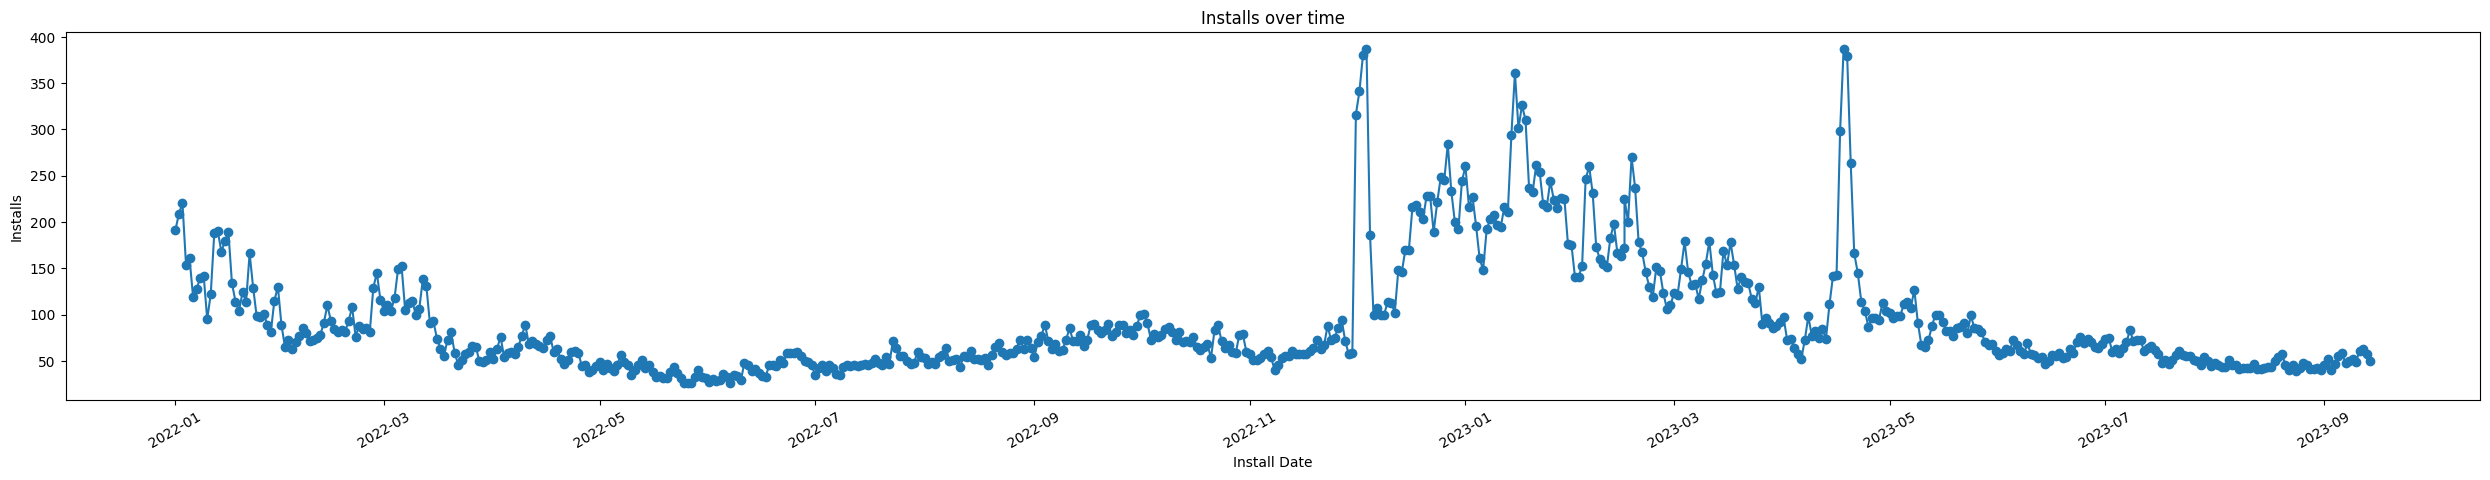

In [162]:
fig, ax = plt.subplots(figsize=(25, 5))  # можно задать размер графика

ax.plot(df_install_s_2['install_date'], df_install_s_2['installs'], marker='o', linestyle='-')
ax.set_xlabel('Install Date')
ax.set_ylabel('Installs')
ax.set_title('Installs over time')
plt.xticks(rotation=45)  # чтобы даты не налезали
plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

In [152]:
plt.show()

In [153]:
df_install_s_2['install_date']=pd.to_datetime(df_install_s_2['install_date'])

In [154]:
df_source_2_main = df_install_main[df_install_main['source']=='Source 2'].groupby(['install_date'])['source'].agg(['count']).reset_index()
df_source_2_main.rename(columns={'count':'installs_main'}, inplace=True)

In [155]:
df_source_2_main

,install_date,installs_main
0,2022-01-01,172
1,2022-01-02,136
2,2022-01-03,174
3,2022-01-04,160
4,2022-01-05,165
...,...,...
617,2023-09-10,25
618,2023-09-11,29
619,2023-09-12,49
620,2023-09-13,36


In [156]:
df_compare=df_install_s_2.merge(df_source_2_main, on=['install_date'], how='left')

In [157]:
df_compare.describe()

,Unnamed: 0,install_date,installs,installs_main
count,623.000000,623,623.000000,623.000000
mean,311.000000,2022-11-07 15:49:59.036918016,93.454254,65.162119
min,0.000000,2022-01-01 00:00:00,26.000000,15.000000
25%,155.500000,2022-06-05 12:00:00,52.000000,37.000000
50%,311.000000,2022-11-08 00:00:00,71.000000,50.000000
75%,466.500000,2023-04-11 12:00:00,110.500000,84.000000
max,622.000000,2023-09-14 00:00:00,387.000000,213.000000
std,179.988889,NaN,63.298106,39.137580


In [158]:
df_compare

,Unnamed: 0,install_date,installs,installs_main
0,0,2022-01-01,191.0,172
1,1,2022-01-02,209.0,136
2,2,2022-01-03,220.0,174
3,3,2022-01-04,154.0,160
4,4,2022-01-05,161.0,165
...,...,...,...,...
618,618,2023-09-10,49.0,25
619,619,2023-09-11,61.0,29
620,620,2023-09-12,63.0,49
621,621,2023-09-13,57.0,36


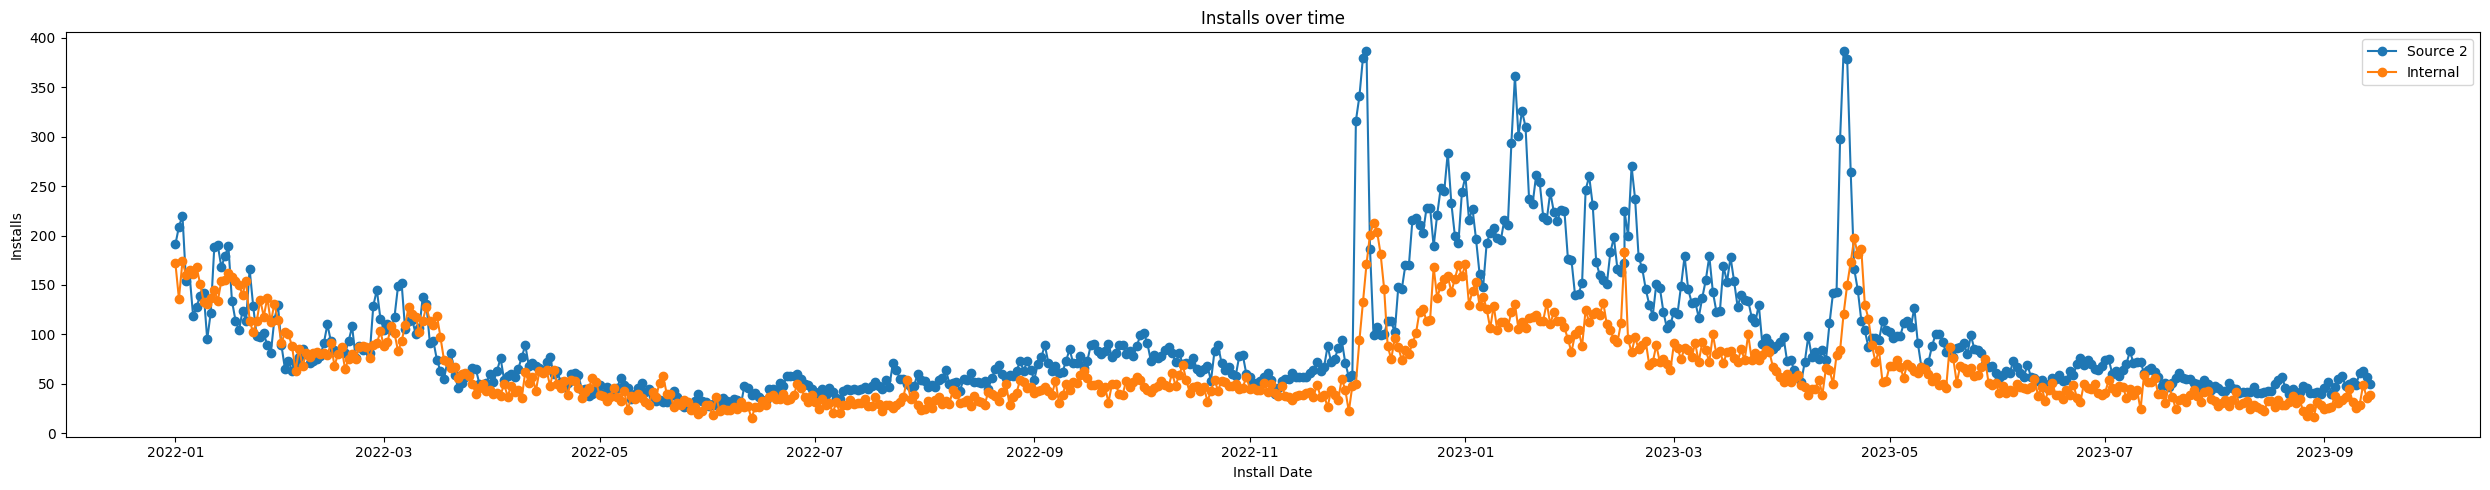

In [159]:


fig, ax = plt.subplots(figsize=(25, 5))

# Предположим, что все данные в df_compare
ax.plot(df_compare['install_date'], df_compare['installs'], marker='o', linestyle='-', label='Source 2')
ax.plot(df_compare['install_date'], df_compare['installs_main'], marker='o', linestyle='-', label='Internal')

ax.set_xlabel('Install Date')
ax.set_ylabel('Installs')
ax.set_title('Installs over time')
ax.legend()  # добавляем легенду
#plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [160]:
import plotly.graph_objects as go

# Вычислим разницу
df_compare['gap'] = df_compare['installs'] - df_compare['installs_main']

fig = go.Figure()

# Source 2
fig.add_trace(go.Scatter(
    x=df_compare['install_date'],
    y=df_compare['installs'],
    mode='lines+markers',
    name='Source 2',
    hovertemplate='Source 2: %{y}<br>Date: %{x}<extra></extra>'
))

# Internal
fig.add_trace(go.Scatter(
    x=df_compare['install_date'],
    y=df_compare['installs_main'],
    mode='lines+markers',
    name='Internal',
    hovertemplate='Internal: %{y}<br>Date: %{x}<extra></extra>'
))

# Gap (разница)
fig.add_trace(go.Scatter(
    x=df_compare['install_date'],
    y=df_compare['gap'],
    mode='lines+markers',
    name='Gap (Source 2 - Internal)',
    hovertemplate='Gap: %{y}<br>Date: %{x}<extra></extra>'
))

# Настройки графика
fig.update_layout(
    title='Installs over time with comparison',
    xaxis_title='Install Date',
    yaxis_title='Installs',
    xaxis=dict(tickangle=-30),
    width=2000,
    height=500,
    hovermode='x unified'  # показывает все значения в одной полоске при наведении
)

fig.show()


In [163]:
import plotly.graph_objects as go

# Убедимся, что даты в формате datetime
df_sor_2_cont_1['contributor_1_date'] = pd.to_datetime(df_sor_2_cont_1['contributor_1_date'])
df_sor_2_cont_2['contributor_2_date'] = pd.to_datetime(df_sor_2_cont_2['contributor_2_date'])
df_compare['install_date'] = pd.to_datetime(df_compare['install_date'])

# Вычислим разницу для Source 2 и Internal
df_compare['gap'] = df_compare['installs'] - df_compare['installs_main']

fig = go.Figure()

# contributor_1
fig.add_trace(go.Scatter(
    x=df_sor_2_cont_1['contributor_1_date'],
    y=df_sor_2_cont_1['contributor_1'],
    mode='lines+markers',
    name='contributor_1',
    hovertemplate='contributor_1: %{y}<br>Date: %{x}<extra></extra>'
))

# contributor_2
fig.add_trace(go.Scatter(
    x=df_sor_2_cont_2['contributor_2_date'],
    y=df_sor_2_cont_2['contributor_2'],
    mode='lines+markers',
    name='contributor_2',
    hovertemplate='contributor_2: %{y}<br>Date: %{x}<extra></extra>'
))

# Source 2 (общие установки)
fig.add_trace(go.Scatter(
    x=df_compare['install_date'],
    y=df_compare['installs'],
    mode='lines+markers',
    name='Source 2',
    hovertemplate='Source 2: %{y}<br>Date: %{x}<extra></extra>'
))

# Internal
fig.add_trace(go.Scatter(
    x=df_compare['install_date'],
    y=df_compare['installs_main'],
    mode='lines+markers',
    name='Internal',
    hovertemplate='Internal: %{y}<br>Date: %{x}<extra></extra>'
))

# Gap
fig.add_trace(go.Scatter(
    x=df_compare['install_date'],
    y=df_compare['gap'],
    mode='lines+markers',
    name='Gap (Source 2 - Internal)',
    hovertemplate='Gap: %{y}<br>Date: %{x}<extra></extra>'
))

# Настройки графика
fig.update_layout(
    title='Installs over time: Contributors vs Source 2 & Internal',
    xaxis_title='Install Date',
    yaxis_title='Installs',
    xaxis=dict(tickangle=-30),
    width=2000,
    height=600,
    hovermode='x unified'  # показывает все значения при наведении на одну дату
)

fig.show()


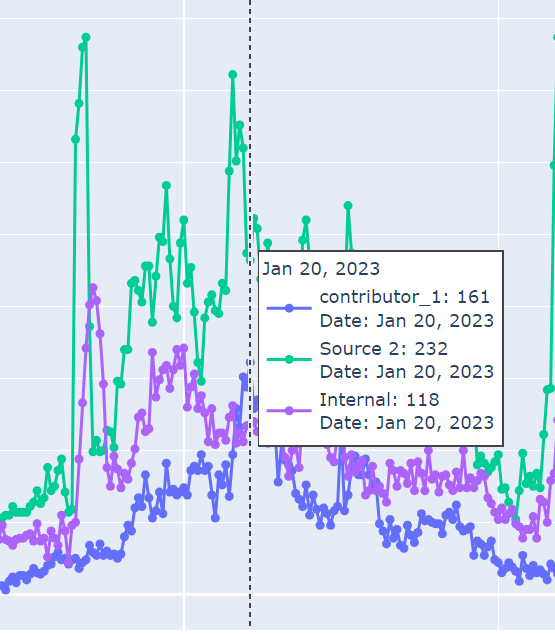

<Axes: >

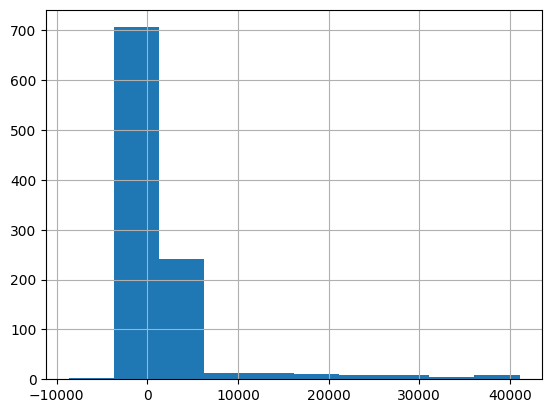

In [161]:
df_contr_1=df_install_main[df_install_main['contributor_2']=='Source 2']
((df_contr_1["install_time"] - df_contr_1["contributor_2_touch_time"]
).dt.total_seconds() / 60).hist()

In [ ]:
df_contr_1

In [165]:
#Задания 1
Предположения о задвоение, учете не последнего посещения (contrib 1,2)

In [ ]:
df_install_main.head()

In [ ]:
df_install_main.info()